In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
data=pd.read_csv("/content/Mall_Customers.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [2]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## univariate analysis

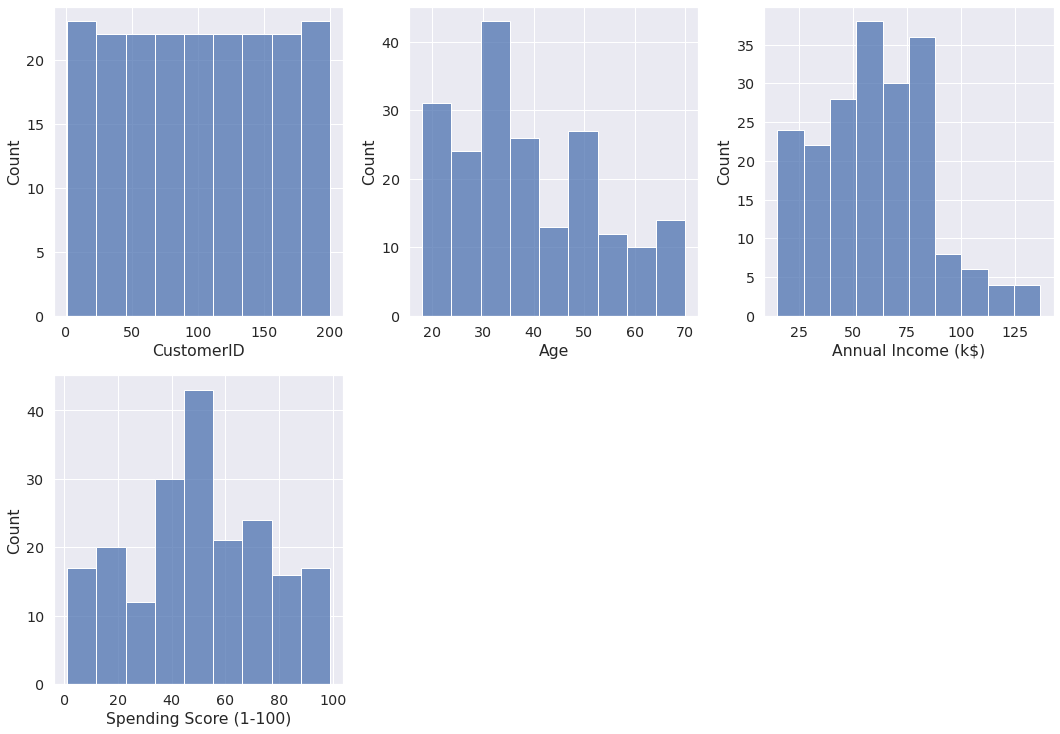

In [4]:
cols = 3
rows = 3
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = data[col], ax = ax)
    
fig.tight_layout()  
plt.show()

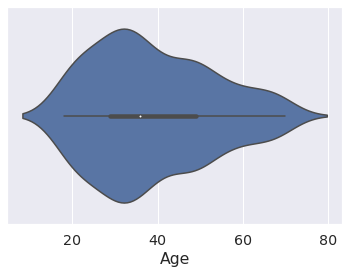

In [5]:
sns.violinplot(x=data["Age"])

## Bivariate analysis

In [6]:
import matplotlib.pyplot as plt

## create scatterplot of hours vs. score

Text(0, 0.5, 'CustomerID')

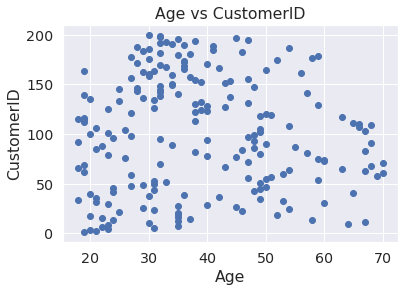

In [7]:
plt.scatter(data.Age, data.CustomerID)
plt.title('Age vs CustomerID')
plt.xlabel('Age')
plt.ylabel('CustomerID')

## multivariate analysis

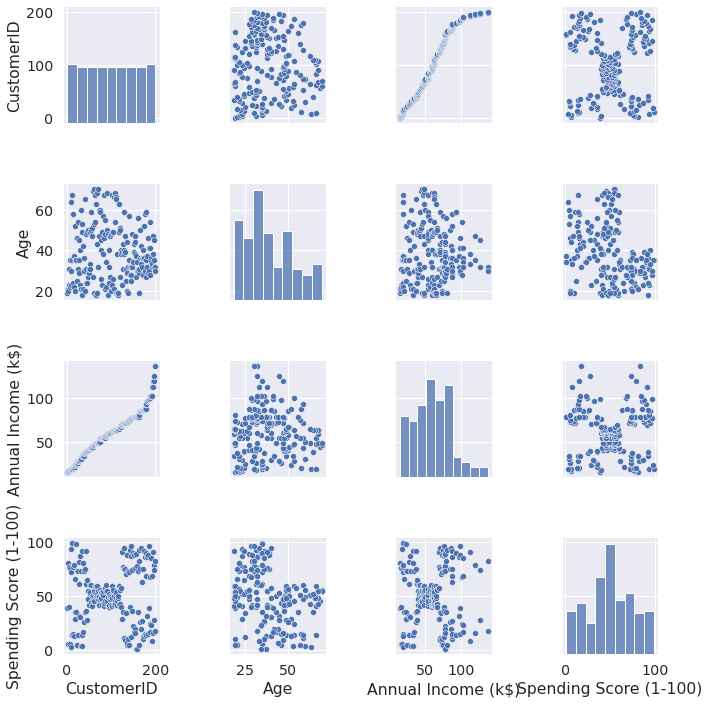

In [8]:
sns.pairplot(data);

In [9]:
data.mean() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [10]:
data.median() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

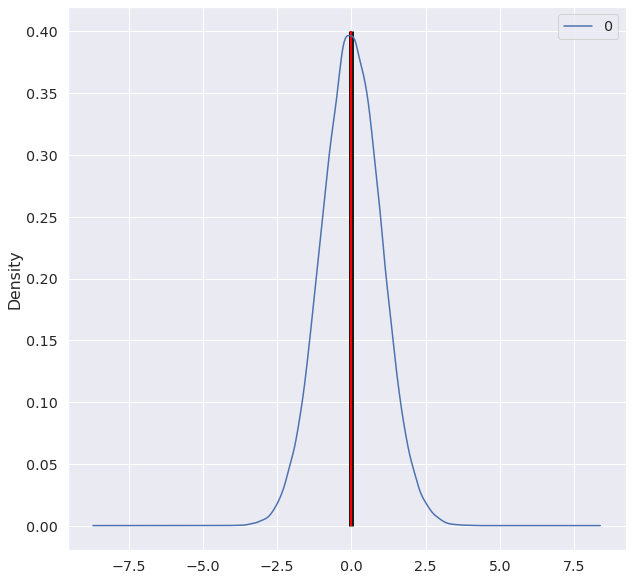

In [11]:
norm_data = pd.DataFrame(np.random.normal(size=100000))

norm_data.plot(kind="density",
              figsize=(10,10));
        
plt.vlines(norm_data.mean(),     
           ymin=0, 
           ymax=0.4,
           linewidth=5.0);

plt.vlines(norm_data.median(),   
           ymin=0, 
           ymax=0.4, 
           linewidth=2.0,
           color="red");







## identifying the missing value

In [12]:
df = pd.DataFrame(data)
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


## filling the missing value with previous value

In [13]:
df.fillna(method ='pad')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## filling null values in missing values

In [14]:
data[0:]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## identifying the outliers

In [17]:
print(df['Annual Income (k$)'].skew())
df['Annual Income (k$)'].describe()

0.3218425498619055


count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

## replacing the outliers

In [18]:
print(df['Annual Income (k$)'].quantile(0.50)) 
print(df['Annual Income (k$)'].quantile(0.95)) 
df['Annual Income (k$)'] = np.where(df['Annual Income (k$)'] > 325, 140, df['Annual Income (k$)'])
df.describe()

61.5
103.0


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## perform encoding

In [19]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
categorical_columns

['Gender']

In [20]:
data_categorical = data[categorical_columns]
data_categorical.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [21]:
from sklearn import preprocessing

  
## label_encoder object knows how to understand word labels.

In [22]:
label_encoder = preprocessing.LabelEncoder()

## Encode labels in column 'species'.

In [23]:
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()

array([1, 0])

## import packages

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


## importing data

In [25]:
print(df.shape)

(200, 5)


## head of the data

In [27]:
print('Head of the dataframe : ')
print(df.head())

print(df.columns)

X= df['Annual Income (k$)']
y=df['Spending Score (1-100)']

Head of the dataframe : 
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


## using the train test split function

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
X,y , random_state=104,test_size=0.25, shuffle=True)

## printing out train and test sets

In [29]:
print('X_train : ')
print(X_train.head())
print(X_train.shape)

print('')
print('X_test : ')
print(X_test.head())
print(X_test.shape)

print('')
print('y_train : ')
print(y_train.head())
print(y_train.shape)

print('')
print('y_test : ')
print(y_test.head())
print(y_test.shape)

X_train : 
73     50
30     30
23     25
155    78
157    78
Name: Annual Income (k$), dtype: int64
(150,)

X_test : 
104    62
128    71
49     40
34     33
64     48
Name: Annual Income (k$), dtype: int64
(50,)

y_train : 
73     56
30      4
23     73
155    89
157    78
Name: Spending Score (1-100), dtype: int64
(150,)

y_test : 
104    56
128    11
49     42
34     14
64     51
Name: Spending Score (1-100), dtype: int64
(50,)


## scaling

In [30]:
df_scaled = df.copy()
col_names = ['Annual Income (k$)', 'Spending Score (1-100)']
features = df_scaled[col_names]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled[col_names] = scaler.fit_transform(features.values)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 10))

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,5.000000,6.938776
1,2,1,21,5.000000,9.081633
2,3,0,20,5.040984,5.255102
3,4,0,23,5.040984,8.877551
4,5,0,31,5.081967,6.989796
...,...,...,...,...,...
195,196,0,35,9.303279,8.979592
196,197,0,45,9.549180,6.377551
197,198,1,32,9.549180,8.724490
198,199,1,32,10.000000,5.867347


## k-means clustering


In [31]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot


## define dataset


In [32]:
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)


## define the model


In [33]:
model = KMeans(n_clusters=2)


## fit the model


In [34]:
model.fit(X)


KMeans(n_clusters=2)

## assign a cluster to each example


In [35]:
yhat = model.predict(X)


## retrieve unique clusters


In [36]:
clusters = unique(yhat)


## create scatter plot for samples from each cluster


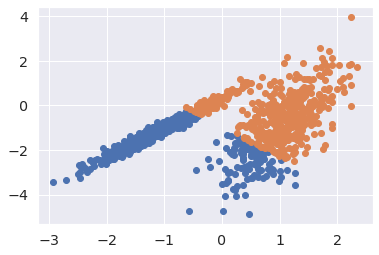

In [37]:
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

## get row indexes for samples with this cluster
    

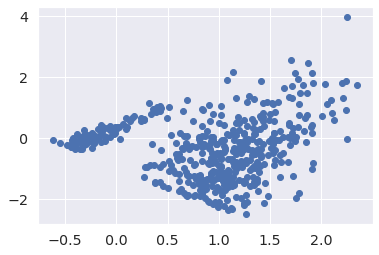

In [38]:
pyplot.scatter(X[row_ix, 0], X[row_ix, 1])


## show the plot


In [39]:
pyplot.show()

## testing and training


In [40]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 


## split the dataset

In [41]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)
print(X_train, X_test, y_train, y_test)

     CustomerID  Gender  Age  Annual Income (k$)
61           62       1   19                  46
125         126       0   31                  70
180         181       0   37                  97
154         155       0   47                  78
80           81       1   57                  54
..          ...     ...  ...                 ...
67           68       0   68                  48
192         193       1   33                 113
117         118       0   49                  65
47           48       0   27                  40
172         173       1   36                  87

[190 rows x 4 columns]      CustomerID  Gender  Age  Annual Income (k$)
18           19       1   52                  23
170         171       1   40                  87
107         108       1   54                  63
98           99       1   48                  61
177         178       1   27                  88
182         183       1   46                  98
5             6       0   22                 

In [42]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## test dataset

In [43]:
print (X_test) 

     CustomerID  Gender  Age  Annual Income (k$)
18           19       1   52                  23
170         171       1   40                  87
107         108       1   54                  63
98           99       1   48                  61
177         178       1   27                  88
182         183       1   46                  98
5             6       0   22                  17
146         147       1   48                  77
12           13       0   58                  20
152         153       0   44                  78


## predicted values

In [44]:
print (y_pred) 

[ 4  1 48 55 86 75 81  5  4  5]


In [45]:
X_train

,CustomerID,Gender,Age,Annual Income (k$)
61,62,1,19,46
125,126,0,31,70
180,181,0,37,97
154,155,0,47,78
80,81,1,57,54
...,...,...,...,...
67,68,0,68,48
192,193,1,33,113
117,118,0,49,65
47,48,0,27,40


In [46]:
X_test

,CustomerID,Gender,Age,Annual Income (k$)
18,19,1,52,23
170,171,1,40,87
107,108,1,54,63
98,99,1,48,61
177,178,1,27,88
182,183,1,46,98
5,6,0,22,17
146,147,1,48,77
12,13,0,58,20
152,153,0,44,78


In [47]:
y_train

61     55
125    77
180    32
154    16
80     51
       ..
67     48
192     8
117    59
47     47
172    10
Name: Spending Score (1-100), Length: 190, dtype: int64

In [48]:
y_test

18     29
170    13
107    46
98     42
177    69
182    15
5      76
146    36
12     15
152    20
Name: Spending Score (1-100), dtype: int64

## Select algorithm

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()


## Fit model to the data

In [50]:

model.fit(X_train, y_train)

DecisionTreeClassifier()


## Check model performance on training data

In [51]:

predictions = model.predict(X_train)
print(accuracy_score(y_train, predictions))

1.0


## Evaluate the model on the test data

In [52]:
predictions = model.predict(X_test)
predictions

array([14, 95, 56, 49, 75,  7, 40, 16, 14,  7])

In [53]:
print(accuracy_score(y_test, predictions))

0.0


In [54]:
df = X_test.copy()
df['Actual'] = y_test
df['Prediction'] = predictions
df

,CustomerID,Gender,Age,Annual Income (k$),Actual,Prediction
18,19,1,52,23,29,14
170,171,1,40,87,13,95
107,108,1,54,63,46,56
98,99,1,48,61,42,49
177,178,1,27,88,69,75
182,183,1,46,98,15,7
5,6,0,22,17,76,40
146,147,1,48,77,36,16
12,13,0,58,20,15,14
152,153,0,44,78,20,7


In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
X_actual = [0, 1, 0, 1, 0, 0, 1, 0, 0, 0]
Y_predic = [1, 0, 1, 1, 1, 0, 1, 1, 0, 0]
results = confusion_matrix(X_actual, Y_predic)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(X_actual, Y_predic))
print ('Classification Report : ')
print (classification_report(X_actual, Y_predic))
print('AUC-ROC:',roc_auc_score(X_actual, Y_predic))
print('LOGLOSS Value is',log_loss(X_actual, Y_predic))

Confusion Matrix :
[[3 4]
 [1 2]]
Accuracy Score is 0.5
Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.33      0.67      0.44         3

    accuracy                           0.50        10
   macro avg       0.54      0.55      0.49        10
weighted avg       0.62      0.50      0.52        10

AUC-ROC: 0.5476190476190477
LOGLOSS Value is 17.26970803642742
